In [1]:
#导入数据
def load_dataset(file_path):
    data = []
    for line in open(file_path):  
        line_tmp = line.split()
        x = float(line_tmp[0])
        y = float(line_tmp[1])
        point = [x,y]
        data.append(point) 
    return data

In [2]:
#作图
import matplotlib.pyplot as plt
  
def show(dataSet, k, centroids, clusterAssment):
    from matplotlib import pyplot as plt
    numSamples, dim = dataSet.shape  
    mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
    mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    for i in range(k):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
    plt.show()

In [3]:
#K-means核心算法
from numpy import *
import numpy as np

#随机生成初始k个质心
def create_cent(dataSet, k):
    n = shape(dataSet)[1] # 矩阵列长度
    centroids = mat(zeros((k,n))) #生成给定形状和类型的用0填充的矩阵
    #随机生成k个质心
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(array(dataSet)[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids

#计算欧几里得距离
def dist_euclidean(vector_a, vector_b):
    return sqrt(sum(power(vector_a - vector_b, 2)))
    
def kMeans(dataSet, k, distMeas=dist_euclidean, create_cent=create_cent):
    m = shape(dataSet)[0] # 矩阵行长度
    clusterAssment = mat(zeros((m,2))) #生成给定形状和类型的用0填充的矩阵
    centroids = create_cent(dataSet, k) #随机生成初始k个质心
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #循环每个点，以分配到最近的质心
            minDist = inf
            minIndex = -1
            for j in range(k): #循环每质心，找到距离i最近的那一个
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; 
                    minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        for cent in range(k):#重新计算质心
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]] #重新给每个质心分派点
            centroids[cent,:] = mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

myCentroids:
[[0.41776029 0.13791735]
 [0.16781304 0.15789432]
 [0.58381354 0.3042928 ]
 [0.33670984 0.41121106]]
clustAssing:
[[1.00000000e+00 1.88359338e-03]
 [1.00000000e+00 1.10218214e-03]
 [1.00000000e+00 1.10382738e-03]
 [1.00000000e+00 2.20275292e-03]
 [1.00000000e+00 4.30622219e-04]
 [1.00000000e+00 5.68592574e-03]
 [1.00000000e+00 2.74105702e-04]
 [1.00000000e+00 2.19301706e-03]
 [1.00000000e+00 8.22374624e-03]
 [1.00000000e+00 1.25172717e-03]
 [3.00000000e+00 5.43357078e-03]
 [3.00000000e+00 4.57228064e-04]
 [3.00000000e+00 1.95889036e-04]
 [3.00000000e+00 1.52942455e-03]
 [3.00000000e+00 2.40559330e-03]
 [3.00000000e+00 1.32026955e-03]
 [3.00000000e+00 2.04305997e-03]
 [3.00000000e+00 5.92338374e-03]
 [3.00000000e+00 3.96364522e-03]
 [3.00000000e+00 4.77027744e-03]
 [2.00000000e+00 1.99375315e-03]
 [2.00000000e+00 4.50046600e-03]
 [2.00000000e+00 9.74302478e-04]
 [2.00000000e+00 2.30221543e-03]
 [2.00000000e+00 9.30053155e-03]
 [2.00000000e+00 3.73019398e-03]
 [2.00000000e+0

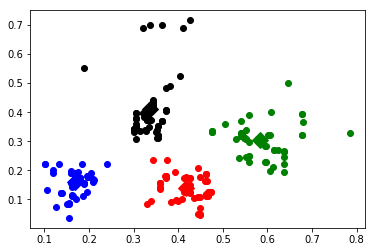

In [4]:
from numpy import *
FILE_DIR = "./KMeans.txt"
k = 4

dataMat = mat(load_dataset(FILE_DIR))
myCentroids, clustAssing= kMeans(dataMat,k)
print("myCentroids:")
print(myCentroids)
print("clustAssing:")
print(clustAssing)
show(dataMat, k, myCentroids, clustAssing)  